In [ ]:
!pip install keybert

In [ ]:
import numpy as np
import pandas as pd
import random
import os
from keybert import KeyBERT
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [ ]:
model = KeyBERT('distilbert-base-nli-mean-tokens')  # DistilBERT의 특정 버전
# KeyBERT가 위 모델을 기반으로 텍스트에서 중요한 키워드를 효과적으로 추출할 수 있도록

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.02k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/550 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/265M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/450 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DAT/NLP/speaking_topics.csv', encoding='iso-8859-1')
print(len(data))
#data=data[0:100]
data['keys']='-'

600


In [ ]:
data.head()

,Topics,keys
0,Do you agree or disagree with the statement: S...,-
1,Do you agree that employees should have the ri...,-
2,Some professors prefer to answer students¡¦ qu...,-
3,Some people think with the development of tech...,-
4,Suppose two different universities have accept...,-


In [ ]:
kw0 = model.extract_keywords(data['Topics'],top_n=10)
# 키워드를 추출한 결과를 kw0에 저장

In [ ]:
kw0
# 키워드, 중요도(유사도) 점수

[[('laptops', 0.2499),
  ('computer', 0.1597),
  ('students', 0.0943),
  ('school', 0.0066),
  ('lab', -0.0062),
  ('schools', -0.0155),
  ('disagree', -0.0715),
  ('carry', -0.1322),
  ('close', -0.1745),
  ('agree', -0.1861)],
 [('employees', 0.4096),
  ('home', 0.3726),
  ('work', 0.3268),
  ('support', 0.2807),
  ('agree', 0.2307),
  ('wish', 0.2096),
  ('details', 0.1931),
  ('opinion', 0.1896),
  ('specific', 0.1868),
  ('include', 0.1706)],
 [('professors', 0.3731),
  ('lecture', 0.3023),
  ('students', 0.1623),
  ('learning', 0.1072),
  ('stop', -0.0321),
  ('questions', -0.0332),
  ('better', -0.0381),
  ('answer', -0.043),
  ('prefer', -0.0513),
  ('end', -0.0658)],
 [('internet', 0.2239),
  ('libraries', 0.1337),
  ('necessary', 0.1324),
  ('eventually', 0.1289),
  ('disappear', 0.1081),
  ('technology', 0.1043),
  ('people', 0.1018),
  ('development', 0.0587),
  ('support', 0.0508),
  ('details', 0.0252)],
 [('expensive', 0.2315),
  ('universities', 0.2074),
  ('academic', 

In [ ]:
WS0=[]
for i,w in enumerate(kw0):  # i는 인덱스, w는 텍스트의 top10 키워드 목록
    ws=[]
    for wi in w:  # wi는(키워드, 중요도 점수) 형태의 튜플
        if '_' not in wi[0]:  #키워드에 밑줄이 포함되지 않으면 실행 (다중단어로 구성된 키워드를 제외하기 위함)
            ws+=[wi[0]]   #해당 키워드를 ws리스트에 추가
    WS0+=ws  # ws에 저장된 모든 키워드를 누적하여 WS0에 저장.
    data.iloc[i,1]=' '.join(ws)  # data 데이터프레임에 i번째 행 2번째 열(keys컬럼)에 키워드를 문자열로 결합하여 저장
display(data)

,Topics,keys
0,Do you agree or disagree with the statement: S...,laptops computer students school lab schools d...
1,Do you agree that employees should have the ri...,employees home work support agree wish details...
2,Some professors prefer to answer students¡¦ qu...,professors lecture students learning stop ques...
3,Some people think with the development of tech...,internet libraries necessary eventually disapp...
4,Suppose two different universities have accept...,expensive universities academic university tui...
...,...,...
595,Green technologies encompass innovations and p...,sustainability environmental eco renewable bio...
596,Indigenous languages are essential components ...,threats colonialism revitalization globalizati...
597,Science communication plays a crucial role in ...,scientists science scientific communicators cr...
598,Allyship involves leveraging one's privilege a...,allyship solidarity amplifying advocate allies...


In [ ]:
# WS0 리스트에서 등장 횟수가 10회 이상인 키워드만 필터링하여 C2라는 딕셔너리에 저장

from collections import defaultdict,deque,Counter
C0=Counter(WS0)
C2={}
for c in C0:
    if C0[c]>10:
        C2[c]=C0[c]
print(C2)

{'students': 18, 'disagree': 24, 'agree': 28, 'work': 16, 'support': 35, 'details': 48, 'specific': 12, 'include': 15, 'learning': 18, 'better': 12, 'prefer': 23, 'technology': 15, 'people': 30, 'explain': 53, 'make': 12, 'response': 12, 'statement': 12, 'examples': 16, 'media': 19, 'social': 33, 'change': 12, 'job': 19, 'life': 12, 'impact': 39, 'choose': 20, 'use': 11, 'argument': 25, 'education': 18, 'new': 11, 'talk': 37, 'time': 63, 'climate': 11, 'thing': 15, 'benefits': 43, 'importance': 21, 'favorite': 26, 'discuss': 81, 'memorable': 16, 'society': 19, 'difficult': 13, 'role': 12, 'world': 20, 'cultural': 19, 'implications': 12, 'sustainable': 14, 'ethical': 29, 've': 11, 'animal': 12, 'global': 12, 'limits': 13, 'challenges': 12, 'environmental': 16, 'economic': 13, 'societies': 14}


In [ ]:
# C2 딕셔너리의 키워드를 등장 횟수에 따라 내림차순으로 정렬한 후,
# 키워드와 그 빈도를 각각 x와 y라는 리스트에 저장
sorted_counts = sorted(C2.items(), key=lambda x: x[1], reverse=True)
x = [item[0] for item in sorted_counts]
y = [item[1] for item in sorted_counts]

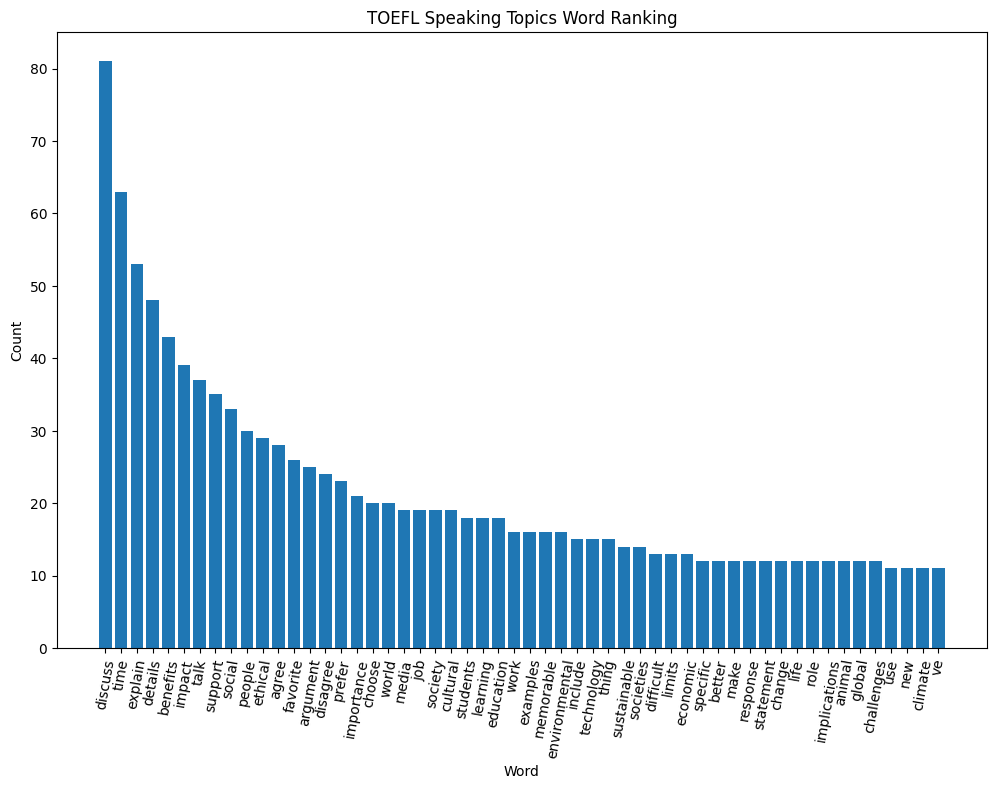

In [ ]:
# TOEFL Speaking Topics 데이터의 단어 빈도 수를 막대 그래프로 시각화
plt.figure(figsize=(12,8))
plt.bar(x, y)
plt.xlabel('Word')
plt.ylabel('Count')
plt.xticks(rotation=80)
plt.title('TOEFL Speaking Topics Word Ranking')
plt.show()